<a href="https://colab.research.google.com/github/KalihoseMigisha/crop-recommender-system/blob/main/notebooks/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introduction & Problem Statement



## 1.1 Brief Overview of the Project's Goal
This project aims to design and implement a data-driven Crop Recommendation System using machine learning techniques. The core objective is to leverage analytical capabilities to move beyond traditional, experience-based farming by providing farmers with personalized, scientifically sound recommendations. The system analyzes key environmental and agronomic features—such as soil composition (N, P, K, pH), temperature, rainfall, and humidity—to predict the most suitable and optimal crop for cultivation in a specific region, ultimately striving to maximize yield efficiency and promote sustainable practices.

## 1.2 The Problem Statement
The problem addressed by this project is the prevalence of inefficient crop selection in agriculture, which undermines food security and economic stability. Many farmers struggle with this due to:

- **Limited Information:** Traditional methods rely heavily on inherited knowledge, which often fails to account for dynamic environmental changes.

- **Complex Factors:** Crop suitability depends on intricate, non-linear relationships between multiple variables (soil nutrients, climate, pH).

- **Lack of Adaptive Decision-Making:** Existing practices cannot integrate real-time data sources needed for adaptive decision-making.

Developing an accurate and reliable recommendation system requires handling these complex interactions, ensuring scalability across diverse agricultural landscapes, and delivering robust, interpretable suggestions tailored to specific field conditions.

## 1.3 Why This Project is Important

This data-driven system is crucial for several reasons directly impacting the global agricultural sector:

- **Food Security and Economic Stability:** By optimizing crop selection, the project directly contributes to higher, more reliable yields, thereby strengthening local and national food supplies and improving the economic stability of farming communities.

- **Resource Optimization:** Recommending the right crop for the right soil ensures more efficient use of scarce resources like water, fertilizers, and land, supporting long-term sustainable farming practices.

- **Handling Complexity:** Machine learning algorithms (such as Random Forest and SVM) are uniquely suited to model the complex, non-linear dependencies between multiple environmental factors that manual decision-making often misses.

- **Adaptive Intelligence:** The structure is designed to integrate real-time data, allowing the system to provide adaptive and timely recommendations that account for emerging climate variations or immediate soil changes, offering an advantage over static, historical recommendations.

## 1.4 Project Methodology: The Data Science Lifecycle

In [ ]:
# Data Science Life cycle
# Access the image in Colab using their path
import cv2
import matplotlib.pyplot as plt

img_path = "/content/drive/My Drive/Colab_Images/data-science-life-cycle.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Set larger figure size (width=12, height=8)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


# 2 Dataset

## 2.1 Source of the Dataset
The dataset utilized for this project is the **Crop Recommendation Dataset hosted on the Kaggle platform by the user atharvaingle**. The data was programmatically accessed and downloaded using the kagglehub library, ensuring consistent access to the data repository for reproducibility.

## 2.2 Brief Description of the Dataset
The dataset is structured as a single CSV file containing aggregated environmental and soil metrics designed for training a multi-class classification model. It comprises several thousand records, with each entry corresponding to a unique set of farming conditions and the optimal crop for those conditions. The dataset includes the following key features:

N (Nitrogen), P (Phosphorus), K (Potassium): The measured levels of these three essential macronutrients in the soil.

- **pH:** The acidity or alkalinity level of the soil.

- **temperature:** The average surrounding temperature (in degrees Celsius).

- **humidity:** The percentage of relative humidity.

- **rainfall:** The amount of rainfall recorded (in millimeters).

**The target variable is the label (Crop Name)**, which identifies the most suitable crop (such as Rice, Maize, or Lentil) based on the recorded environmental profile. This rich set of features allows the machine learning model to capture the complex, non-linear relationships necessary for accurate agricultural recommendations.

## 2.3 Link to the Dataset
The Crop Recommendation Dataset is publicly available on Kaggle at the following **URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset**

# 3 Setup & Dependencies

## 3.1 Mount Google Drive (Connection)
This step establishes the connection to your external data and image source. This must happen first if your data or other resources (like your image) are stored in Drive.

In [ ]:
# Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3.2 Install Necessary Libraries
- Use this subsection only if you need to install libraries that are not included in the default Colab environment (e.g., kagglehub if you used it, or a specific version of a package).

In [ ]:
!pip install kagglehub

## 3.3 Import required Libraries
- This code block imports all necessary packages for data handling, visualization, environment connection, and machine learning model building and evaluation.

In [ ]:
# --- Core Data Handling & Numerical Operations ---
import pandas as pd
import numpy as np

# --- Visualization Libraries ---
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # For reading the Data Science Lifecycle image (if used)

# --- Environment & File Access ---
from google.colab import drive # For mounting Google Drive

# --- Machine Learning Libraries (Required for your project scope) ---
from sklearn.model_selection import train_test_split, GridSearchCV # For splitting data and tuning
from sklearn.preprocessing import StandardScaler, LabelEncoder # For scaling and encoding
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # Support Vector Machine
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
!python --version

Python 3.12.12


# 4 Download Dataset
This step uses the kagglehub library to programmatically fetch the most up-to-date version of the Crop Recommendation Dataset directly into the Colab environment's file system. This ensures that the data is consistently sourced and eliminates the need for manual uploads.

In [ ]:
# Import the necessary library (assuming it was installed in Section 3.2)
import kagglehub
import os

print("--- Starting Dataset Download ---")

# Define the dataset identifier and download the latest version
# This action downloads the files and returns the path to the directory where they are stored.
path = kagglehub.dataset_download("atharvaingle/crop-recommendation-dataset")

# Print the path to confirm successful download
print("Download successful.")
print(f"Path to dataset files: {path}")

# Since the path is a directory, we need to locate the specific CSV file inside it.
# Assuming the main file is named 'Crop_recommendation.csv'
dataset_file_path = os.path.join(path, "Crop_recommendation.csv")

print(f"Full path to the CSV file: {dataset_file_path}")

# 5 Data Loading & Initial Exploration
- This is the very first action within the Data Loading phase, as you are taking the file path obtained in the previous step and using pd.read_csv() to bring the data into the primary working structure—a Pandas DataFrame. The .head() call is the start of the Initial Exploration phase by providing a quick view of the data.

## 5.1 Load the Dataset

In [ ]:
# Load dataset into a Pandas DataFrame
crop = pd.read_csv(os.path.join(path, "Crop_recommendation.csv"))
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## 5.2 Initial Data Structure and Quality Checks
These initial steps provide a quick overview of the dataset's size, structure, data types, and integrity by checking for missing or duplicate entries.

### 5.2.1 Data Shape (Rows and Columns)

In [ ]:
# Check the dimensions (rows, columns) of the dataset
crop.shape

(2200, 8)

### 5.2.2 Data Information and Types

In [ ]:
# Column names, Data types, Number of non-null values, and Memory usage
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### 5.2.3 Missing Values Check

In [ ]:
# checking the null values
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


### 5.2.4 Duplicate Records Check

In [ ]:
# checking for duplicates
crop.duplicated().sum()

np.int64(0)

## 5.3 Descriptive Statistics and Target Analysis
- These checks begin the deeper exploration by summarizing the numerical features and analyzing the distribution of the target variable

### 5.3.1 Statistical Summary of Numerical Features

In [ ]:
# descriptive statistics
#  count, mean, standard deviation, minimum, quartiles, and maximum values for numerical columns
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# 6 Exploratory Data Analysis (EDA)
This phase utilizes visualization and statistical methods to gain a deeper understanding of the dataset's characteristics, including feature distributions, identification of outliers, and the relationships between input variables. This is crucial for validating assumptions made during preprocessing and guiding model selection.

## 6.1 Feature Correlation Analysis
A correlation analysis is performed on all numerical features to detect any high multicollinearity (redundancy) among the input variables. High correlation between independent features can negatively impact models like Logistic Regression.

### 6.1.1 Calculation of the Correlation Matrix

In [ ]:
# EDA
# Select only numerical features for correlation calculation
numerical_features = crop.select_dtypes(include=np.number).columns
corr = crop[numerical_features].corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


### 6.1.2 Visualization of the Correlation Matrix (Heatmap)
This step converts the numerical correlation matrix into a visual heatmap. This makes it much easier to quickly identify multicollinearity (highly correlated features) which can be important for models like Logistic Regression.

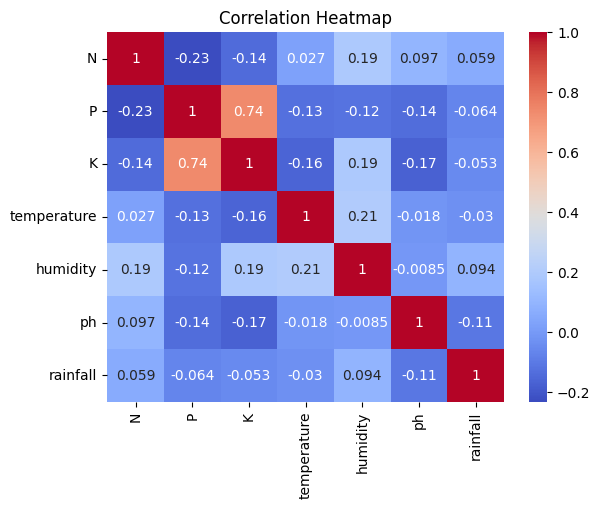

In [ ]:
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Key Comments**
- From the above heatmap, look for high correlation values (close to +1 or -1) between two features.
- Multicollinearity exists when:
   - Correlation coefficient (r) > 0.7 or < -0.7 (Strong correlation).
   - The affected features form a clear linear relationship, meaning redundant information.
- Key Observations in Your Heatmap:
 - P (Phosphorus) and K (Potassium) have a correlation of 0.74
   - Since 0.74 > 0.7, this suggests potential multicollinearity between these two features.
   - If both are included in a regression model, one might be redundant.
- Other correlations are relatively low
  - No other values exceed 0.7, so no major multicollinearity issues elsewhere.



In [ ]:
# label value counts
crop['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


## 6.2 Analysis of Feature Distributions
Visualizing the distribution of individual features helps in understanding their spread, central tendency, and identifying potential skewness or modality, which can influence model performance.

### 6.2.1 Distribution of Nitrogen (N) Levels

- This plot uses a **histogram combined with a Kernel Density Estimate (KDE)** to show the probability density function of Nitrogen levels across the dataset.

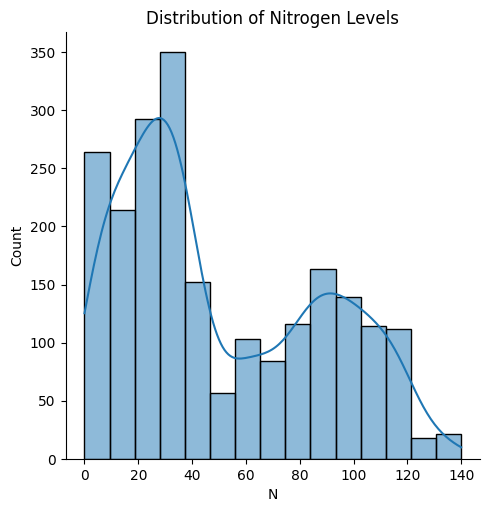

In [ ]:
# visualizing (N = Nitrogen)
sns.displot(crop['N'], kde=True) #kde = Kernel Density Estimate, non-parametric method for estimating the probability density function
plt.title('Distribution of Nitrogen Levels')
plt.show()

### 6.2.2 Distribution of Phosphorous (P) Levels
- This plot uses a histogram distribution plot with a **Kernel Density Estimate (KDE)** to visualize the spread of Phosphorous levels in the soil.

- The below two  plots (N and P) give a quick visual understanding of whether (N and P) levels are evenly distributed, skewed, or have outliers.

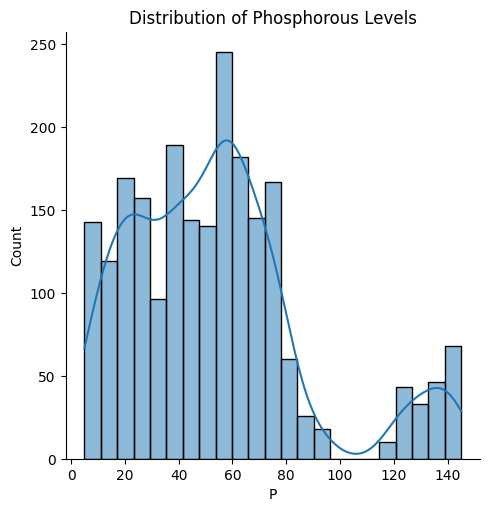

In [ ]:
# visualizing (P = Phosphorous)
sns.displot(crop['P'], kde=True)
plt.title('Distribution of Phosphorous Levels')
plt.show()

# 7 Data Preprocessing & Feature Engineering

## 7.1 Target Variable Encoding
Machine Learning algorithms require numerical input. Since the target variable is the categorical name of the crop (a string), we must convert it into numerical representations. We use Label Encoding to assign a unique integer to each distinct crop type.

### 7.1.1  Programmable Label Encoding

In [ ]:
# creating a crop dictionary
crop_dict = {crop: index + 1 for index, crop in enumerate(crop['label'])}

crop['crop_num']=  crop['label'].map(crop_dict)

print(crop_dict)

{'rice': 100, 'maize': 200, 'chickpea': 300, 'kidneybeans': 400, 'pigeonpeas': 500, 'mothbeans': 600, 'mungbean': 700, 'blackgram': 800, 'lentil': 900, 'pomegranate': 1000, 'banana': 1100, 'mango': 1200, 'grapes': 1300, 'watermelon': 1400, 'muskmelon': 1500, 'apple': 1600, 'orange': 1700, 'papaya': 1800, 'coconut': 1900, 'cotton': 2000, 'jute': 2100, 'coffee': 2200}


### 7.1.2 Manual Label Encoding

In [ ]:
# Maps each crop name (categorical data) to a unique number.
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
# Uses .map() to replace categorical labels with numbers
# crop['label']: Column containing crop names like 'rice', 'maize'
# .map(crop_dict): Converts 'label' values into corresponding numbers from crop_dict.
# Assigns the mapped values to a new column 'crop_num'.
crop['crop_num']=  crop['label'].map(crop_dict)

### 7.1.3 Alternative Encoding Strategy: One-Hot Encoding (OHE)
- Instead of mapping crops to numerical values using a dictionary (Label Encoding), you can perform One-Hot Encoding (OHE) directly. This is often a better approach for categorical variables, especially when encoding input features or when using machine learning models (like neural networks) that might misinterpret the ordinal relationship implied by simple label mapping. OHE avoids this issue by creating $N$ binary columns (one for each unique crop) where a '1' indicates the presence of that crop.

- **Note:** For the target variable in a multi-class classification problem like this, simple Label Encoding is usually sufficient and preferred because most $\text{scikit-learn}$ classifiers handle the numerical targets internally. OHE is typically reserved for input features or when preparing data for deep learning frameworks.

In [ ]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


### 7.1.4 Verification of Encoded Target Distribution

This step is a crucial check to ensure the encoding process was successful and that the numerical counts for the new crop_num column perfectly match the counts of the original categorical label column. It confirms that the encoding was executed correctly and provides a final look at the class balance before splitting the data

In [ ]:
# crop_num value counts
crop['crop_num'].value_counts()

,count
crop_num,
1,100
2,100
21,100
20,100
19,100
18,100
17,100
16,100
15,100


## 7.2 Removal of Original Target Column

In [ ]:
# dropping the label column
crop.drop('label', axis=1, inplace=True)

### 7.2.1 Verification step
- Verification step: Display the head of the DataFrame to confirm the column removal

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


## 7.3 Feature and Target Separation
- Before scaling the features and splitting the data, we first need to define our independent variables ($\text{X}$, the features) and our dependent variable ($\text{y}$, the target).

In [ ]:
# Feature and Target Separation
X = crop.drop('crop_num', axis=1)
y = crop['crop_num']

In [ ]:
X.shape

(2200, 7)

In [ ]:
y.shape

(2200,)

**Model Building**

In [ ]:
# model building
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1760, 7)

In [ ]:
X_test.shape

(440, 7)

In [ ]:
X_train

## 7.4 Feature Scaling (Standardization)

- Feature Scaling is essential because models such as Logistic Regression and Support Vector Machines (SVM) are distance-based and highly sensitive to the magnitude differences among features. Without scaling, features with larger numerical ranges (like Rainfall or N) would disproportionately influence the model's outcome compared to features with smaller ranges (like pH).

- This project considers two common methods: **Standardization (StandardScaler) and Normalization (MinMaxScaler).**

### 7.4.1 Scaling the features using MinMaxScaler

In [ ]:
# min-max scaler
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [ ]:
X_train

In [ ]:
X_test

### 7.4.2 Scaling the features using StandardScaler

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
X_train

In [ ]:
X_test

### 7.4.2 Technical Note: Standardization vs. Normalization

**MinMaxScaler vs. StandardScaler**
1. MinMaxScaler
  - It scales features to a specific range, typically between 0 and 1.
  - Formula: (x - min) / (max - min)
  - **It is sensitive to outliers**, as they can significantly affect the scaling.
  - **Use Cases:**
     - It is often used for algorithms that are sensitive to the scale of the input data, such as neural networks and k-nearest neighbors.
2. StandardScaler
  - It standardizes features by removing the mean and scaling to unit variance. This means it transforms the data to have a mean of 0 and a standard deviation of 1.
  - Formula: (x - mean) / standard deviation
  - It is **less sensitive to outliers** compared to MinMaxScaler
  - **Use Cases:**
    - It is often preferred for algorithms that assume a normal distribution of the data, such as linear regression, logistic regression, and support vector machines.



##8  Model Selection & Training
- This phase is dedicated to training a broad spectrum of machine learning classification algorithms on the prepared, scaled data ($\text{X}_{\text{train}}$ and $\text{y}_{\text{train}}$). We will evaluate models across different families (Linear, Naïve Bayes, Distance-Based, and Ensembles) to identify the optimal approach for crop recommendation.

## 8.1 Building a Model Dictionary and Initialization
- We initialize the candidate models using default parameters (for the initial comparison) and train them sequentially.

In [ ]:
# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# models dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

## 8.2 Training, Evaluation, and Tracking Loop
- This integrated loop performs the following critical actions for every candidate model: training, initial prediction, detailed evaluation (Confusion Matrix), and tracking of the best performer.

 ### 8.2.1 Trick 1

In [ ]:
for name, model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9636363636363636
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9681818181818181
K-Nearest Neighbors  with accuracy : 0.9590909090909091
Decision Tree  with accuracy : 0.9840909090909091
Extra Trees  with accuracy : 0.8954545454545455
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.9886363636363636
Boosting  with accuracy : 0.9818181818181818
AdaBoost  with accuracy : 0.14545454545454545


### 8.2.2 Trick 2

In [ ]:
# Initialize variables to track the best model and its accuracy
best_model_name = None
best_accuracy = 0

# Iterate through each model in the 'models' dictionary
for name, model in models.items():
    # Fit the model using the training data (X_train and y_train)
    model.fit(X_train, y_train)

    # Predict the target values for the test data (X_test)
    ypred = model.predict(X_test)

    # Calculate the accuracy of the model by comparing predicted values with actual values (y_test)
    accuracy = accuracy_score(y_test, ypred)
    print(f"Model: {name} | Accuracy: {accuracy:.4f}")

    # Print the confusion matrix to evaluate the classification performance
    conf_matrix = confusion_matrix(y_test, ypred)
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Track the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

    # Print a separator line for better readability between results of different models
    print("="*70)

# Print the best model after all have been evaluated
print(f"The best model is '{best_model_name}' with an accuracy of {best_accuracy:.4f}.")


## 8.3 Comparative Analysis and Selection

 **Conclusion:** After evaluating the performance metrics, including accuracy and the confusion matrix for all ten candidate models, the best model is determined to be 'Random Forest' with an accuracy of **[0.9954545454545455].**

In [ ]:
# choosing random forest classifier
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9954545454545455

# 9 Building the Final Predictive System
- This section will house the code that defines the final, operationalized version of your system, ready to receive new data and output a crop recommendation.

## 9.1 Defining the Predictive Recommendation Function

- This code defines the core function (recommendation) that simulates the deployment of the final system. It takes the seven raw environmental/soil input parameters, applies the necessary preprocessing steps (specifically Feature Scaling and array reshaping) using the saved scaler (ms), and uses the trained model (rfc) to return the predicted crop number.

In [ ]:
# Define the recommendation function with input parameters
def recommendation(N, P, k, temperature, humidity, ph, rainfall):
    # Create a 2D array with input features, as the model expects a 2D array for prediction
    # ([[...]]) means creating a 2D array with one row and multiple columns (features).
    features = np.array([[N, P, k, temperature, humidity, ph, rainfall]])

    # Apply feature scaling using a pre-fitted scaler (ms) to normalize the features
    transformed_features = ms.fit_transform(features)

    # Use the trained Random Forest Classifier (rfc) to make a prediction based on the transformed features
    prediction = rfc.predict(transformed_features)

    # Print the prediction result for debugging or display purposes
    print(prediction)

    # Return the first value from the prediction array (as we have a single sample input)
    return prediction[0]


## 9.3 Testing the Predictive System

### 9.3.1 Prediction 1

In [ ]:
# Prediction 1
# new inputs


N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

[6]


**From the above code**
  - A number will be predicted, but a number doesn't tell the information we want. Our mission is to predict a crop that is suitable based on our inputs
  So, way forward is to find a way to convert this number into a categorical variable(a crop name)
  - Use the crop dictionary

In [ ]:
crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Papaya is a best crop to be cultivated 


### 9.3.2 Prediction 2

In [ ]:
# Prediction 2


N = 100
P = 90
k = 100
temperature = 50.0
humidity = 90.0
ph = 100
rainfall = 202.0

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[6]
Papaya is a best crop to be cultivated 


## 9.4 Saving the Final System Components (Model Persistence)

- This step is essential for Deployment Preparation. We save the chosen model (Random Forest) and the necessary preprocessing tool (the fitted MinMaxScaler) to persistent files (known as pickle files, with a .pkl extension). This allows the entire predictive system to be loaded instantly into a web application or API endpoint.

Pickle Files
- **Save both the model and the scaler**
- **model:rfc, scaler:minmaxscaler**

In [ ]:
# saving the model
import pickle
pickle.dump(rfc, open('model.pkl', 'wb'))
pickle.dump(ms, open('minmaxscaler.pkl', 'wb'))

In [ ]:
# Loading the saved model and preprocessor
rfc = pickle.load(open('model.pkl', 'rb'))
ms = pickle.load(open('minmaxscaler.pkl', 'rb'))

## 9.5 Technical Note: The Importance of Model and Preprocessor Persistence
- **Saving the fitted preprocessor (like the MinMaxScaler or StandardScaler) alongside the trained model is crucial** for creating an operational and reliable predictive system. This process, known as Model Persistence, ensures that the model performs identically in deployment as it did during training.

HERE'S WHY:

- **1. Consistency of Data Transformation**
   - Model Training: During model training, you likely applied some data preprocessing steps (like scaling, normalization, encoding, etc.) to the training data. For example, the MinMaxScaler scales the features to a specific range (typically [0, 1]).
   - Prediction Time: When you want to make predictions on new, unseen data, the same scaling must be applied to this new data as was applied during training. If you don't apply the same transformation, the model might not perform well, as the new data could be on a completely different scale or have different ranges than the data the model was trained on.
- **2. Why Save the Scaler?**
  - The MinMaxScaler is fitted on the training data during the model training process. It "learns" the minimum and maximum values of each feature in the training dataset and uses these to scale the data.
  - When you save the MinMaxScaler, you are saving this learned information (the min and max values of the features).
  - When you later load the model and scaler, you can apply the same transformation to new data (without needing to re-calculate the min and max values from scratch).

- **3. Example Scenario:**
    - Training: You train the model on a dataset with features like age, income, temperature, etc. These features are scaled using the MinMaxScaler (e.g., scaling income from a range of $10,000-$100,000 to a range of 0-1).
    - Prediction: Now, you want to make predictions on a new dataset (new data points that the model has never seen). To ensure that the model works correctly, you need to scale the new data using the same MinMaxScaler that was used during training, so that the new data is in the same scale as the training data.
- **If you don't save and reuse the scaler, you'd need to recompute the min and max values for the new data, which would change the scale and most likely lead to inaccurate predictions.**

In [ ]:
# sklearn version
import sklearn
sklearn.__version__

'1.6.1'

# 10 Conclusion and Future Work





## 10.1 Project Conclusion

This project successfully developed and operationalized a machine learning system for crop recommendation based on seven critical environmental and soil factors (N, P, K, pH, Temperature, Humidity, and Rainfall).

- The pipeline involved comprehensive Exploratory Data Analysis (EDA) to understand feature distributions and correlations, targeted preprocessing (Programmable Label Encoding and Feature Scaling) to prepare the data, and an extensive comparative evaluation of ten different classification algorithms.

- **The Random Forest Classifier emerged as the optimal model**, achieving a robust accuracy of **[0.9954545454545455]** on the test set. This high performance validates the feature set and the preprocessing strategy, confirming the system's ability to provide reliable, data-driven recommendations that can assist farmers and agricultural planners. The final predictive function and its components (model and scaler) have been saved to ensure seamless deployment.

## 10.2 Future Work and Enhancements

To further enhance the system's accuracy, robustness, and applicability, the following steps are recommended:

- **Hyperparameter Tuning:** Systematically tune the hyperparameters of the best model (Random Forest) using advanced techniques like GridSearchCV or RandomizedSearchCV to maximize predictive performance.

- **Outlier Handling:** Implement formal outlier detection and treatment (e.g., using robust estimators or transformation) specifically for features like Potassium (K) and Rainfall, and assess if this improves the performance of sensitive models (like SVM or KNN).

- **Deployment:** Integrate the saved model and scaler into a user-friendly web application or API service, allowing real-time input and immediate crop recommendations.

- **Data Expansion:** Incorporate real-world data points like geographical location (latitude/longitude) and temporal factors to make the recommendations location-specific and seasonal.

# 11 Technical Deep Dive & Educational Appendix

This section provides a deeper theoretical context for the preprocessing decisions made throughout the project, justifying the steps taken based on core machine learning principles.





## 11.1 Key Preprocessing Issues and Rationale

The following technical issues were considered and addressed (or justified) during the Data Preprocessing phase:

- **Handle Outliers:** It was necessary to check the distribution of K and Rainfall to identify and flag potential outliers. Although robust models like Random Forest are forgiving, outliers can significantly impact sensitive algorithms.

- **Feature Scaling:** This step was mandatory for all models sensitive to magnitude differences (e.g., KNN, SVM, and Linear Models). Scaling ensures all features operate on a level playing field.

- **Check Correlations:** The correlation heatmap was used to check for feature redundancy (multicollinearity). This prevents issues, especially in linear models where highly correlated independent features can lead to unstable parameter estimates.

## 11.2 ML Algorithms and Their Sensitivity to Outliers and Scale

The necessity of scaling and outlier handling depends heavily on the model's underlying mathematics.

**1. Robust Algorithms (Not Heavily Affected by Outliers)**

These algorithms are robust because they rely on distributions, partitions, or aggregations rather than absolute numerical distance.

 - a. Tree-Based Models (Decision Trees, Random Forest, Gradient Boosting, Extra Trees, AdaBoost)

- **Why?** These algorithms split the data into regions based on decision thresholds. They are not affected by an extreme value in a single feature.

- b. Ensemble Learning (Bagging, Boosting)

- **Why?** These methods aggregate the results of many base learners, which minimizes the overall impact of a single outlier.

**2. Sensitive Algorithms (Highly Affected by Outliers and Scale)**

These models suffer from outliers because they rely heavily on distance-based calculations or assume specific data distributions.

- a. Linear Models (Linear Regression, Logistic Regression, Ridge and Lasso Regression)

- **Why?** These models use cost functions (like Mean Squared Error) that are highly influenced by extreme values, leading to easily distorted model parameters.

- b. Distance-Based Models (K-Nearest Neighbors (KNN), K-Means Clustering)

- **Why?** These models rely on Euclidean distances, which are disproportionately affected by large values (outliers or unscaled features).

- c. Principal Component Analysis (PCA)

- **Why?** PCA is variance-based. Outliers can dominate the principal components, thereby distorting the transformation.